In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

### Problem 1

In [4]:
restitution = np.array([0.6248, 0.6520, 0.6226, 0.6230, 0.6351, 0.6128, 0.6134,0.6368, 0.6280, 0.6131, 0.6275, 0.6403, 0.6310, 0.6118, 0.6220, 0.6096, 0.6223, 0.6261, 0.6521, 0.6065, 0.6159, 0.6151, 0.6300, 0.6297, 0.6262, 0.6049, 0.6214, 0.6298, 0.6121, 0.6107, 0.6435, 0.6262, 0.6170, 0.6141, 0.6192, 0.6548, 0.6392, 0.5978, 0.6314])
restitution.max()

np.float64(0.6548)

#### a) Is there evidence to support the assumption that the coefficient of restitution is normally distributed? 

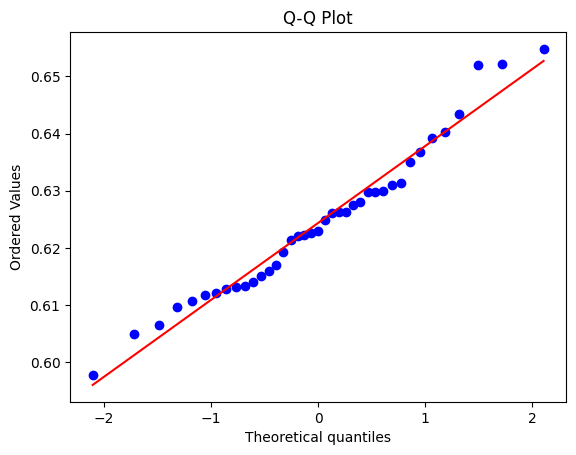

In [5]:

stats.probplot(restitution, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

<Axes: ylabel='Count'>

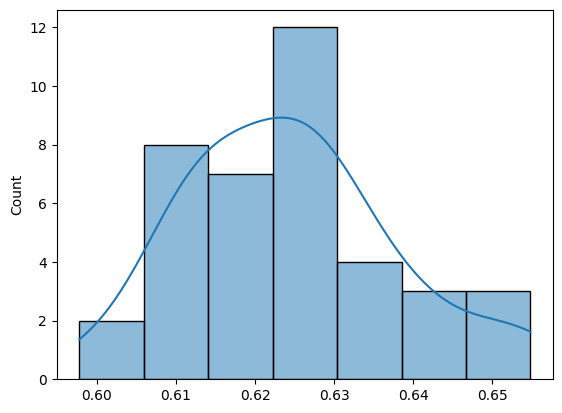

In [6]:
sns.histplot(data=restitution, kde=True)

#### Yes, there is evidence to support the assumption that the coefficient of restitution is normally distributed. The QQplot and KDE are approximately normal

#### (b) Find a 99% CI on the mean coefficient of restitution.

In [7]:
# n = 39, degrees of freedom = 39 - 1 = 38
df = 38
alpha = 0.01  # For 99% confidence, the tail area is 0.01 (since 1% of the probability is split between both tails)

# Find the t-value for the 99% confidence interval
t_value = stats.t.ppf(1 - alpha/2, df)
print(t_value)

2.7115576019130625


In [8]:
sample_mean = restitution.mean()
print('Sample mean is', sample_mean)
sample_std_dev = restitution.std()
print('Sample STD is:', sample_std_dev)
lower_bound = sample_mean - t_value*(sample_std_dev/39**(1/2))
print('Lower bound of the confidence interval is:',  lower_bound)
upper_bound = sample_mean + t_value*(sample_std_dev/39**(1/2))
print('Upper bound of the confidence interval is:',  upper_bound)

Sample mean is 0.6243538461538461
Sample STD is: 0.013058602551257776
Lower bound of the confidence interval is: 0.618683843853236
Upper bound of the confidence interval is: 0.6300238484544562


#### (C) Find the 99% prediction interval on the coefficient of restitution for the next baseball that will be tested. 

In [9]:
lower_bound_PI = sample_mean - t_value*sample_std_dev*((1+(1/39))**(1/2))
print('Lower bound of the prediction interval is:',  lower_bound_PI)
upper_bound_PI = sample_mean + t_value*sample_std_dev*((1+(1/39))**(1/2))
print('Upper bound of the prediction interval is:',  upper_bound_PI)

Lower bound of the prediction interval is: 0.5884936029372009
Upper bound of the prediction interval is: 0.6602140893704914


#### (D) Find an interval that will contain 99% of the values of the coefficient of restitution with 95% confidence

In [10]:
#This appears to be a tolerance interval problem...
k = 3.129 #given that gamma = 0.99, n = 39, with 95% confidence
lower_bound = sample_mean - k*sample_std_dev
print('Lower bound of the interval is:',  lower_bound)
upper_bound = sample_mean + k*sample_std_dev
print('Upper bound of the interval is:',  upper_bound)

Lower bound of the interval is: 0.5834934787709606
Upper bound of the interval is: 0.6652142135367317


### (e) Explain the Difference in the three intervals computed in (b), (c), and (d)

##### (b) we were computing the confidence interval on the mean, which is a range of plausible values for the population mean given a sample mean. For (c), we were computing the prediciton interval, which is the range of future plausible observations of coefficient of restitutions. In (d), we were computing the tolerance interval, which is the range that contains the specific portion of the population (99%) that fall within the given confidence interval. 

In [11]:
print(restitution.min())
print(restitution.max())

0.5978
0.6548


## Problem (2)

#### (A) What Sample size would you reccomend? 

In [12]:
std = 8 
std_new = 6
sample_mean = 5
E= 5
z = 1.96

In [13]:
n = ((z* std)/(E/2))**2
print('Recommended Sample for the new system is:', n)

Recommended Sample for the new system is: 39.337984000000006


#### (B) Find new reccomended sample size given a std of 6 and comment on the difference

In [14]:
n = ((z* std_new)/(E/2))**2
print('New Recommended Sample for the new system is:', n)

New Recommended Sample for the new system is: 22.127615999999996


#### Given the same confidence interval and desired length of the interval, reducing the standard deviation creates a smaller sample size. This makes sense, as to get a range of values for the new mean with 95% confidence, you would need a smaller sample size if the standard deviation is smaller - the data is less spread out. 

### Problem #3 

##### (A) Is there evidence to support the assumption that the dissolved oxygen concentration is normall distributed?

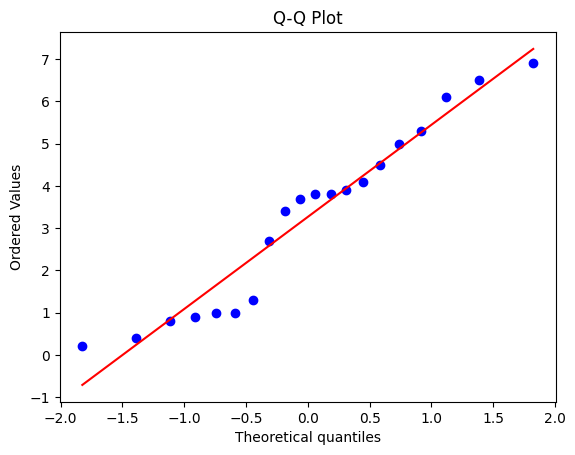

In [15]:
DO_concen = np.array([5.0, 3.4, 3.9, 1.3, 0.2, 0.9, 2.7, 3.7, 3.8, 4.1,
1.0, 1.0, 0.8, 0.4, 3.8, 4.5, 5.3, 6.1, 6.9, 6.5])

stats.probplot(DO_concen, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

#### Yes, there is evidence to support the assumption that the DO conc is normally distributed. The QQplot is approximately normal

##### (B) Find a 95% CI on the mean dissolved oxygen concentration

In [16]:
df = 19 #total of 20 samples
alpha = 0.05 

# Find the t-value for the 99% confidence interval
t_value = stats.t.ppf(1 - alpha/2, df)
print(t_value)

2.093024054408263


In [17]:
sample_mean = DO_concen.mean()
print('Sample mean is', sample_mean)
sample_std_dev = DO_concen.std()
print('Sample STD is:', sample_std_dev)
lower_bound = sample_mean - t_value*(sample_std_dev/20**(1/2))
print('Lower bound of the confidence interval is:',  lower_bound)
upper_bound = sample_mean + t_value*(sample_std_dev/20**(1/2))
print('Upper bound of the confidence interval is:',  upper_bound)

Sample mean is 3.2649999999999997
Sample STD is: 2.073469314940542
Lower bound of the confidence interval is: 2.2945864893382057
Upper bound of the confidence interval is: 4.235413510661793


#### (C) Find a 95% prediction interval on the dissolved oxygen concentration for the next stream in the system that will be tested

In [18]:
lower_bound_PI = sample_mean - t_value*sample_std_dev*((1+(1/20))**(1/2))
print('Lower bound of the prediction interval is:',  lower_bound_PI)
upper_bound_PI = sample_mean + t_value*sample_std_dev*((1+(1/20))**(1/2))
print('Upper bound of the prediction interval is:',  upper_bound_PI)

Lower bound of the prediction interval is: -1.1819933680155081
Upper bound of the prediction interval is: 7.7119933680155075


#### (D) Find an interval that will contain 95% of the values of the dissolved oxygen concentration with 99% confidence

In [19]:
k = 3.168 #given that gamma = 0.95, n = 20, with 99% confidence from Appendix XII
lower_bound = sample_mean - k*sample_std_dev
print('Lower bound of the interval is:',  lower_bound)
upper_bound = sample_mean + k*sample_std_dev
print('Upper bound of the interval is:',  upper_bound)

Lower bound of the interval is: -3.3037507897316374
Upper bound of the interval is: 9.833750789731637


### (E) explain the difference in the three intervals

##### In (b) we were computing the confidence interval on the mean, which is a range of plausible values for the population mean given a sample mean. For (c), we were computing the prediciton interval, which is the range of future plausible observations of the DO concentrations in the stream data. In (d), we were computing the tolerance interval, which is the range that contains the specific portion of the DO values(95%) that falls within the given confidence interval. 

### Problem 4

#### Construct the most appropriate 95% interval estimates for the mean and median annual streamflows for the conecuh river at Brantley, Alabama

In [20]:
# conecuh = pd.read_csv('/home/anna/Desktop/Stats/Conecuh.csv')
conecuh = pd.read_csv('Conecuh.csv')
conecuh = conecuh.set_index('Year')

In [21]:
n= len(conecuh)
df = n - 1
print(df)
alpha = 0.05  

# Find the t-value for the 95% confidence interval
t_value = stats.t.ppf(1 - alpha/2, df)
print(t_value)

sample_mean = conecuh.mean()
print('Sample mean is', sample_mean)
sample_std_dev = conecuh.std()
print('Sample STD is:', sample_std_dev)
lower_bound = sample_mean - t_value*(sample_std_dev/n**(1/2))
print('Lower bound of the confidence interval is:',  lower_bound)
upper_bound = sample_mean + t_value*(sample_std_dev/n**(1/2))
print('Upper bound of the confidence interval is:',  upper_bound)

19
2.093024054408263
Sample mean is Flowcfs    682.75
dtype: float64
Sample STD is: Flowcfs    269.514744
dtype: float64
Lower bound of the confidence interval is: Flowcfs    556.613217
dtype: float64
Upper bound of the confidence interval is: Flowcfs    808.886783
dtype: float64


In [22]:
sample_median = conecuh.median()
sample_median


Flowcfs    581.0
dtype: float64

In [23]:
R1 = 7 + 1 #these are the upper and lower rankings of the observations
RU = n - 7
print(R1)
print(RU)

8
13


In [24]:
Values = conecuh["Flowcfs"].values
sorted = np.sort(Values)
# print(sorted)
print('Lower Bound is', sorted[7])
print('Upper Bound is', sorted[12])

Lower Bound is 574
Upper Bound is 762


#### Compute the Confidence Interval for the 75th Percentile

In [ ]:
percentile_75 = np.percentile(conecuh, 75)
confidence_level = 0.95

alpha = (1 - confidence_level) / 2
lower_percentile = alpha * 100 
upper_percentile = (1 - alpha) * 100 

# # Compute the confidence interval using percentiles
ci_lower = np.percentile(conecuh, lower_percentile)
ci_upper = np.percentile(conecuh, upper_percentile)

print(f"The 75th percentile is: {percentile_75}")
print(f"The {confidence_level*100}% confidence interval for the 75th percentile is: [{ci_lower}, {ci_upper}]")


The 75th percentile is: 901.25
The 95.0% confidence interval for the 75th percentile is: [346.95000000000005, 1175.8999999999999]
